In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, AdaBoostRegressor, BaggingRegressor
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
samp = pd.read_csv("SampleSubmission.csv")
train.head()

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,id_vjcx08sz91,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-10-25,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,id_bkg215syli,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-02,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,id_oui2pot3qd,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-03,13,NaN,NaN,...,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741
3,id_9aandqzy4n,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-08,14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.537600
4,id_ali5x2m4iw,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-09,13,0.000267,0.774656,...,1451.050659,96215.906250,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8071 entries, 0 to 8070
Data columns (total 80 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   id                                                        8071 non-null   object 
 1   site_id                                                   8071 non-null   object 
 2   site_latitude                                             8071 non-null   float64
 3   site_longitude                                            8071 non-null   float64
 4   city                                                      8071 non-null   object 
 5   country                                                   8071 non-null   object 
 6   date                                                      8071 non-null   object 
 7   hour                                                      8071 non-null   int64  
 8   sulphurdioxide_so2

In [4]:
train.describe()

,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
count,8071.000000,8071.000000,8071.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,...,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,8071.000000
mean,0.635678,30.246982,10.877463,0.000024,0.687295,0.000013,0.126581,2.120939,38.671939,-92.912582,...,6089.449805,58478.947647,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,24.639296
std,2.154605,9.393151,0.815875,0.000354,0.142544,0.000220,0.094129,85.450554,18.964322,43.240479,...,2991.879500,18974.281900,2971.949265,27.547282,0.046204,85.873938,14.721454,40.627170,7.038309,24.878920
min,-3.459970,3.201510,10.000000,-0.000980,0.299364,-0.000696,0.000000,-107.710861,0.177093,-165.131509,...,521.378113,10752.090499,9.741494,1.458444,0.090547,-102.706078,2.996863,-159.058782,10.314990,1.200000
25%,0.288630,32.568643,10.000000,-0.000196,0.589849,-0.000137,0.038062,-98.911720,22.811537,-134.823883,...,3687.102253,43231.418685,2701.118575,5.612198,0.228117,-98.865659,37.901279,-125.371559,24.102775,13.270600
50%,0.332610,32.600480,11.000000,0.000012,0.669632,0.000007,0.123876,71.653160,42.564364,-95.848477,...,5389.787844,60432.792969,4389.787844,8.752905,0.257323,-97.477511,49.187592,-74.597511,29.002745,18.375400
75%,0.374653,32.641110,11.000000,0.000221,0.766817,0.000149,0.209070,74.110476,54.238408,-49.662067,...,8047.738159,74276.492371,7047.738159,14.794590,0.285948,72.814735,57.156175,-49.902340,33.929767,28.838400
max,6.595400,36.914272,14.000000,0.002024,1.607052,0.001101,0.299850,77.319656,66.234924,-22.250822,...,17287.677734,100909.219778,16287.677734,250.000002,0.417945,77.319656,66.238778,-22.251009,45.496395,456.193333


In [5]:
train = train.drop(["id", "site_id"], axis=1)

<Axes: >

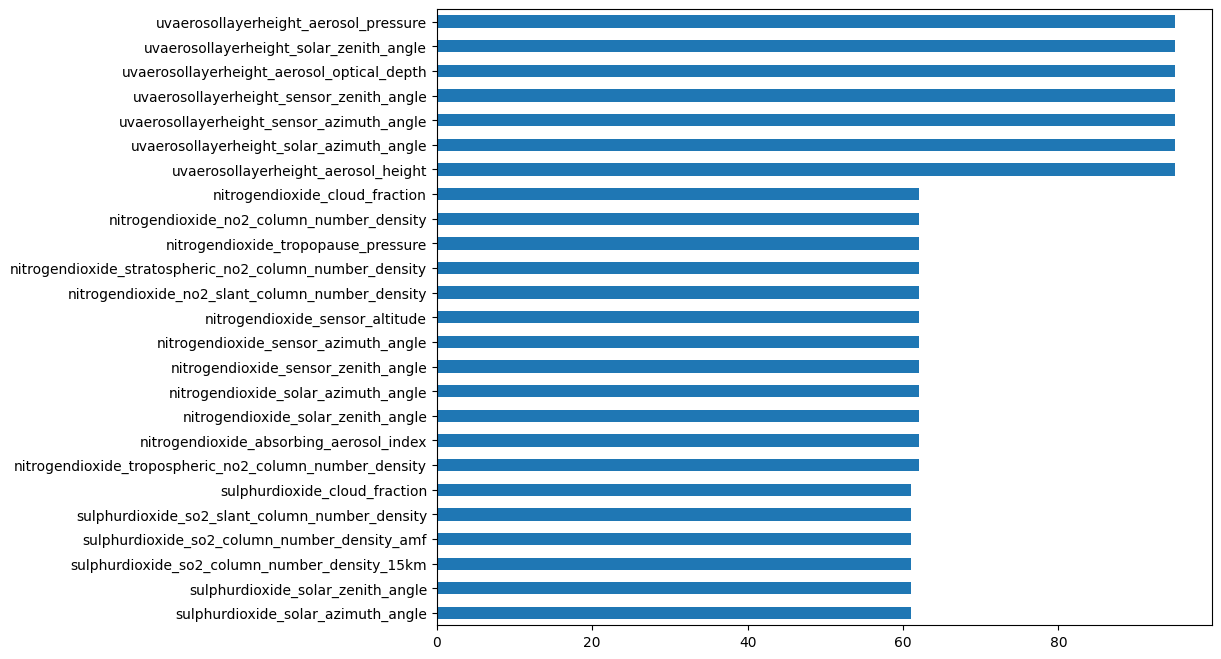

In [6]:
pct_missing = round((train.isnull().sum() / len(train)) * 100)
pct_missing.sort_values(ascending=True).tail(25).plot(kind="barh", figsize=(10, 8))

In [7]:
shape = train.shape

print(f"The dataframe has {shape[0]} rows and {shape[1]} columns.")

The dataframe has 8071 rows and 78 columns.


In [8]:
pc = PCA(n_components=10)
pc

PCA(n_components=10)

In [9]:
# dropping columns with over 60 missing values

for i in train.columns:
    if round((train[i].isnull().sum() / len(train[i])) * 100) > 70:
        train = train.drop(i, axis=1)     

In [10]:
# filling remaining missing values with corresponding mode for Categorical Varibles and Mean for Integers and continous values

for i in train.columns:
    if train[i].dtype == object:
        train[i] = train[i].fillna(train[i].mode())
    else:
        train[i] = train[i].fillna(train[i].mean())

In [11]:
train.isnull().sum()

site_latitude                 0
site_longitude                0
city                          0
country                       0
date                          0
                             ..
cloud_sensor_azimuth_angle    0
cloud_sensor_zenith_angle     0
cloud_solar_azimuth_angle     0
cloud_solar_zenith_angle      0
pm2_5                         0
Length: 71, dtype: int64

In [12]:
train["date"] = pd.to_datetime(train["date"])
train["year"] = train["date"].dt.year
train["month"] = train["date"].dt.month
#train["week"] = train["date"].dt.week
train["day"] = train["date"].dt.day
train.drop("date", axis=1, inplace=True)
train

,site_latitude,site_longitude,city,country,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,...,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5,year,day
0,6.532570,3.399360,Lagos,Nigeria,13,0.000024,0.687295,0.000013,0.126581,2.120939,...,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,12.015000,2023,25
1,6.532570,3.399360,Lagos,Nigeria,12,0.000024,0.687295,0.000013,0.126581,2.120939,...,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,42.267200,2023,2
2,6.532570,3.399360,Lagos,Nigeria,13,0.000024,0.687295,0.000013,0.126581,2.120939,...,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741,2023,3
3,6.532570,3.399360,Lagos,Nigeria,14,0.000024,0.687295,0.000013,0.126581,2.120939,...,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,10.537600,2023,8
4,6.532570,3.399360,Lagos,Nigeria,13,0.000267,0.774656,0.000207,0.223403,-97.811241,...,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731,2023,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8066,-1.268877,36.819139,Nairobi,Kenya,10,0.000024,0.687295,0.000013,0.126581,2.120939,...,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,21.086071,2024,17
8067,-1.268877,36.819139,Nairobi,Kenya,11,-0.000563,0.595788,-0.000335,0.208774,-98.841057,...,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,17.110000,2024,24
8068,-1.268877,36.819139,Nairobi,Kenya,11,0.000024,0.687295,0.000013,0.126581,2.120939,...,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,15.080000,2024,25
8069,-1.268877,36.819139,Nairobi,Kenya,10,-0.000188,0.746123,-0.000140,0.089824,75.947845,...,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,18.026750,2024,26


In [13]:
"""corr_matrix = train.corr()

# Iterate over correlation matrix values
for column in corr_matrix.columns:
    for index in corr_matrix.index:
        if corr_matrix.loc[index, column] > 0.95 and index != column:
            # Drop the column if correlation is greater than 0.5 (excluding self-correlation)
            train.drop(column, axis=1, inplace=True)
            break  # Exit inner loop once a column is dropped

# Print or return the modified DataFrame 'train'
print(train)"""

"corr_matrix = train.corr()\n\n# Iterate over correlation matrix values\nfor column in corr_matrix.columns:\n    for index in corr_matrix.index:\n        if corr_matrix.loc[index, column] > 0.95 and index != column:\n            # Drop the column if correlation is greater than 0.5 (excluding self-correlation)\n            train.drop(column, axis=1, inplace=True)\n            break  # Exit inner loop once a column is dropped\n\n# Print or return the modified DataFrame 'train'\nprint(train)"

In [14]:
shape = train.shape

print(f"This new dataframe has {shape[0]} rows and {shape[1]} columns.")

This new dataframe has 8071 rows and 72 columns.


In [15]:
nums = ['float64']
cats = ['object']

numerical=train.select_dtypes(include=nums)
categorical=train.select_dtypes(include=cats)

Text(0.5, 1.0, 'Observations across Citites')

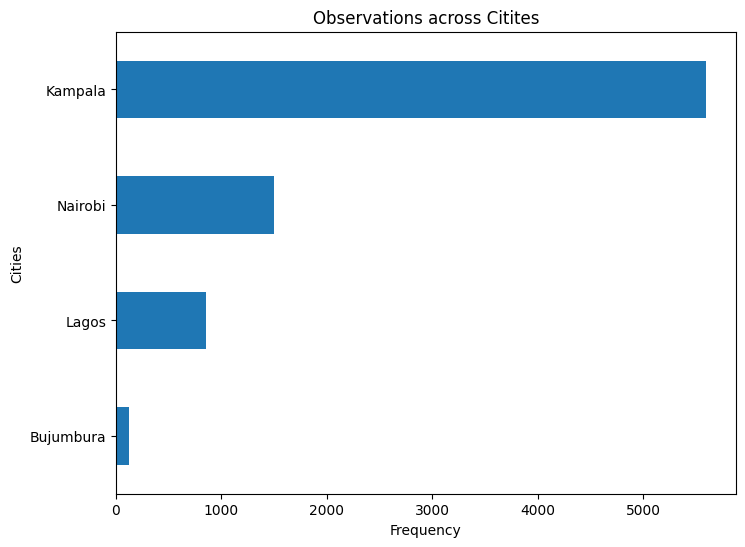

In [16]:

plt.figure(figsize=(8, 6))
train.city.value_counts().sort_values().plot(kind="barh")

plt.xlabel("Frequency")
plt.ylabel("Cities")
plt.title("Observations across Citites")

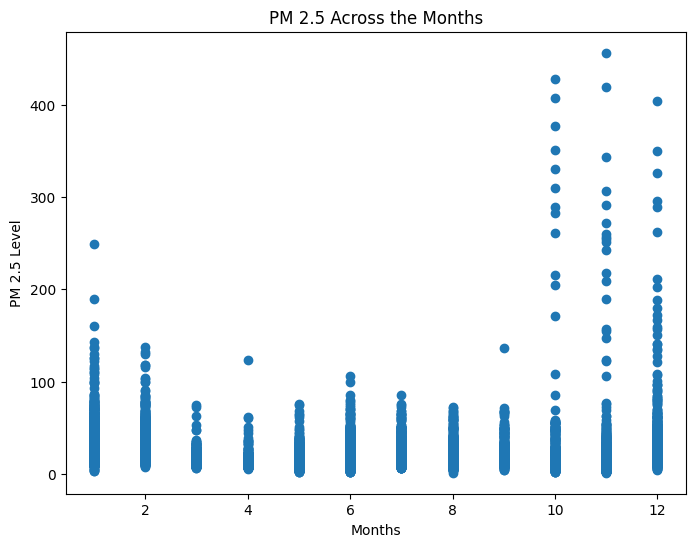

In [17]:
plt.figure(figsize=(8, 6))

plt.scatter(train['month'], train["pm2_5"])
#sns.lmplot(data=train, x='month', y='pm2_5')


plt.xlabel("Months")
plt.ylabel("PM 2.5 Level")
plt.title("PM 2.5 Across the Months")

plt.show()


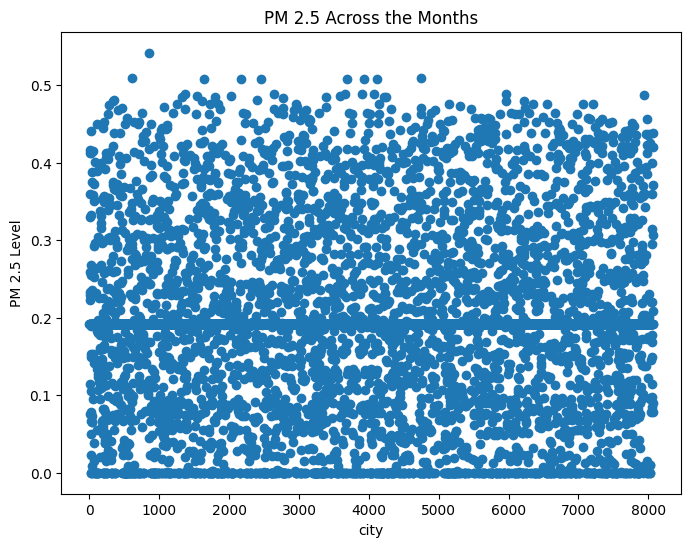

In [18]:
plt.figure(figsize=(8, 6))

plt.scatter(train.index, train["formaldehyde_cloud_fraction"])


plt.xlabel("city")
plt.ylabel("PM 2.5 Level")
plt.title("PM 2.5 Across the Months")

plt.show()


#### Feature Engineering

In [19]:
train[['city', 'country']]

,city,country
0,Lagos,Nigeria
1,Lagos,Nigeria
2,Lagos,Nigeria
3,Lagos,Nigeria
4,Lagos,Nigeria
...,...,...
8066,Nairobi,Kenya
8067,Nairobi,Kenya
8068,Nairobi,Kenya
8069,Nairobi,Kenya


In [20]:
#lab_en = LabelEncoder()

pd.get_dummies(train[['city', 'country']], columns=['country'])

,city,country_Burundi,country_Kenya,country_Nigeria,country_Uganda
0,Lagos,False,False,True,False
1,Lagos,False,False,True,False
2,Lagos,False,False,True,False
3,Lagos,False,False,True,False
4,Lagos,False,False,True,False
...,...,...,...,...,...
8066,Nairobi,False,True,False,False
8067,Nairobi,False,True,False,False
8068,Nairobi,False,True,False,False
8069,Nairobi,False,True,False,False


In [21]:
categorical.columns

Index(['city', 'country'], dtype='object')

In [22]:
lab_en = LabelEncoder()

# Creating a For loop Function to Label-Encode all categorical variables
def encode(data):
    for i in data.columns:
        train[i] = lab_en.fit_transform(train[i])
    
    return train

In [23]:
encode(categorical)

,site_latitude,site_longitude,city,country,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,...,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5,year,day
0,6.532570,3.399360,2,2,13,0.000024,0.687295,0.000013,0.126581,2.120939,...,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,12.015000,2023,25
1,6.532570,3.399360,2,2,12,0.000024,0.687295,0.000013,0.126581,2.120939,...,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,42.267200,2023,2
2,6.532570,3.399360,2,2,13,0.000024,0.687295,0.000013,0.126581,2.120939,...,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741,2023,3
3,6.532570,3.399360,2,2,14,0.000024,0.687295,0.000013,0.126581,2.120939,...,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,10.537600,2023,8
4,6.532570,3.399360,2,2,13,0.000267,0.774656,0.000207,0.223403,-97.811241,...,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731,2023,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8066,-1.268877,36.819139,3,1,10,0.000024,0.687295,0.000013,0.126581,2.120939,...,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,21.086071,2024,17
8067,-1.268877,36.819139,3,1,11,-0.000563,0.595788,-0.000335,0.208774,-98.841057,...,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,17.110000,2024,24
8068,-1.268877,36.819139,3,1,11,0.000024,0.687295,0.000013,0.126581,2.120939,...,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,15.080000,2024,25
8069,-1.268877,36.819139,3,1,10,-0.000188,0.746123,-0.000140,0.089824,75.947845,...,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,18.026750,2024,26


In [24]:
train.head()

,site_latitude,site_longitude,city,country,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,...,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5,year,day
0,6.53257,3.39936,2,2,13,0.000024,0.687295,0.000013,0.126581,2.120939,...,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,12.015000,2023,25
1,6.53257,3.39936,2,2,12,0.000024,0.687295,0.000013,0.126581,2.120939,...,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,42.267200,2023,2
2,6.53257,3.39936,2,2,13,0.000024,0.687295,0.000013,0.126581,2.120939,...,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741,2023,3
3,6.53257,3.39936,2,2,14,0.000024,0.687295,0.000013,0.126581,2.120939,...,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,10.537600,2023,8
4,6.53257,3.39936,2,2,13,0.000267,0.774656,0.000207,0.223403,-97.811241,...,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731,2023,9


In [25]:
X = train.drop("pm2_5", axis=1)
y = train.pm2_5

X.shape

(8071, 71)

In [26]:
X = pc.fit_transform(X)
X

array([[-9.49318950e-01,  1.37355092e+01, -1.49204616e+02, ...,
         4.22682575e+02, -2.75354676e+02,  3.29053684e+01],
       [-1.99646432e+01,  1.90985761e+03, -7.86710075e+02, ...,
         1.43623742e+02,  5.96131948e+01, -5.67098972e+02],
       [-9.92043695e+03, -1.49106671e+01, -7.45305554e+01, ...,
         3.72948320e+02, -2.85059799e+02,  2.38389548e+01],
       ...,
       [ 1.14501525e+01, -1.17141642e+03,  2.71204226e+02, ...,
        -6.04598523e+01, -1.06121297e+02,  2.38244181e+02],
       [-4.50385595e+00,  6.36362676e+02, -7.12025727e+02, ...,
         1.24614577e+02,  1.96392060e+02, -2.99435805e+00],
       [ 2.44772466e+04, -2.11579737e+03, -1.21309070e+03, ...,
         8.23303200e+01,  2.11065118e+02, -5.06547202e-01]])

In [27]:
"""scale = StandardScaler()
X = scale.fit_transform(X)
X"""

'scale = StandardScaler()\nX = scale.fit_transform(X)\nX'

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=11)

In [29]:
boost = XGBRegressor(n_estimators=100, 
                                     max_depth=10, 
                                     max_leaves=10, 
                                     grow_policy="depthwise", 
                                     booster="gbtree")

boost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy='depthwise', importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=10,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
cat = CatBoostRegressor(iterations=10, 
                          depth=16, 
                          learning_rate = 0.01, 
                          loss_function='RMSE',
                          eval_metric = 'RMSE',
                          od_type = "Iter",
                          metric_period = 1,
                          od_wait = 10,
                          random_state=11)

#fitting
cat.fit(X_train, y_train)

0:	learn: 24.7724814	total: 3.7s	remaining: 33.3s
1:	learn: 24.7267357	total: 6.95s	remaining: 27.8s
2:	learn: 24.6813499	total: 10.3s	remaining: 23.9s
3:	learn: 24.6349119	total: 13.7s	remaining: 20.6s
4:	learn: 24.5915560	total: 16.8s	remaining: 16.8s
5:	learn: 24.5474645	total: 20.1s	remaining: 13.4s
6:	learn: 24.5033245	total: 23.3s	remaining: 9.97s
7:	learn: 24.4611432	total: 26.4s	remaining: 6.6s
8:	learn: 24.4189449	total: 29.5s	remaining: 3.28s
9:	learn: 24.3744426	total: 32.9s	remaining: 0us


In [31]:
random = RandomForestRegressor(max_depth=20, min_samples_leaf=10, min_samples_split=10,
                      n_estimators=100, oob_score=True, random_state=11)


#fitting
random.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=10, min_samples_split=10,
                      oob_score=True, random_state=11)

In [32]:
"""#feature importances
random.feature_importances_
feature_imp = pd.DataFrame(random.feature_importances_, index = X_train.columns, columns = ['Feature_importance']).sort_values(by="Feature_importance", ascending=False)
feature_imp.head(10)"""

'#feature importances\nrandom.feature_importances_\nfeature_imp = pd.DataFrame(random.feature_importances_, index = X_train.columns, columns = [\'Feature_importance\']).sort_values(by="Feature_importance", ascending=False)\nfeature_imp.head(10)'

In [33]:
"""#visualizing
feature_imp['Feature_importance'].sort_values(ascending=True).tail(5).plot(kind='barh', title='Feature Importance by Random Forest Regressor', figsize=(12,7))
plt.show()"""

"#visualizing\nfeature_imp['Feature_importance'].sort_values(ascending=True).tail(5).plot(kind='barh', title='Feature Importance by Random Forest Regressor', figsize=(12,7))\nplt.show()"

In [34]:
"""# be patient! this can take a long time


#using Randomized Search CV for hyper parameter tuning
params = {'n_estimators': range(0, 200, 20),
          'criterion':["squared_error"],
          'max_depth': range(0, 20, 5),
          'min_samples_split': range(2, 12, 2),
          'min_samples_leaf': range(2, 10, 2),
          'oob_score': [True]}

rcv = RandomizedSearchCV(estimator = random, param_distributions = params, n_iter = 10, scoring = 'r2', cv = 10, verbose=5,
                         random_state=42, n_jobs=-1, return_train_score=True)
rcv.fit(X_train, y_train)"""

'# be patient! this can take a long time\n\n\n#using Randomized Search CV for hyper parameter tuning\nparams = {\'n_estimators\': range(0, 200, 20),\n          \'criterion\':["squared_error"],\n          \'max_depth\': range(0, 20, 5),\n          \'min_samples_split\': range(2, 12, 2),\n          \'min_samples_leaf\': range(2, 10, 2),\n          \'oob_score\': [True]}\n\nrcv = RandomizedSearchCV(estimator = random, param_distributions = params, n_iter = 10, scoring = \'r2\', cv = 10, verbose=5,\n                         random_state=42, n_jobs=-1, return_train_score=True)\nrcv.fit(X_train, y_train)'

In [35]:
# best estimator
#rcv.best_estimator_

In [36]:
# best parameters
#rcv.best_params_

In [37]:
#best score
#rcv.best_score_

In [38]:
"""# rebuilding the random forest regressor using the best estimator suggested by the Randomized Search CV
final_model = rcv.best_estimator_

#fitting on the training data
final_model.fit(X_train, y_train)"""

'# rebuilding the random forest regressor using the best estimator suggested by the Randomized Search CV\nfinal_model = rcv.best_estimator_\n\n#fitting on the training data\nfinal_model.fit(X_train, y_train)'

In [39]:
"""#predictions on train data
y_pred_train = final_model.predict(X_train)

#predictions on test data
y_pred = boost.predict(X_test)"""

'#predictions on train data\ny_pred_train = final_model.predict(X_train)\n\n#predictions on test data\ny_pred = boost.predict(X_test)'

In [40]:
def model(mde):
    y_pred = mde.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_pred, y_test))
    
    return print(f"The Root Mean Squared Error is: {mse}")
    

In [41]:
cat.best_score_

{'learn': {'RMSE': 24.37444261331189}}

best score=.525, rmse=18.6

In [42]:
from sklearn.ensemble import VotingRegressor

In [43]:
vote = VotingRegressor([("cat", cat), ("xgb", boost), ("randomf", random)])
vote.fit(X_train, y_train)

0:	learn: 24.7724814	total: 3.18s	remaining: 28.6s
1:	learn: 24.7267357	total: 6.56s	remaining: 26.2s
2:	learn: 24.6813499	total: 9.73s	remaining: 22.7s
3:	learn: 24.6349119	total: 12.9s	remaining: 19.4s
4:	learn: 24.5915560	total: 16.1s	remaining: 16.1s
5:	learn: 24.5474645	total: 19.3s	remaining: 12.9s
6:	learn: 24.5033245	total: 22.4s	remaining: 9.59s
7:	learn: 24.4611432	total: 25.6s	remaining: 6.39s
8:	learn: 24.4189449	total: 28.7s	remaining: 3.19s
9:	learn: 24.3744426	total: 32.5s	remaining: 0us


VotingRegressor(estimators=[('cat',
                             <catboost.core.CatBoostRegressor object at 0x000001A3E8DC3BC0>),
                            ('xgb',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_pol...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=10,
                                          max_leaves=10, min_child_weight=None,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=100,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('randomf',
                             RandomForestRegressor(max_depth=20,
                                                   min_samples_leaf=10,
                                                   min_samples_split=10,
                                                   oob_score=True,
                                                   random_state=11))])

In [44]:
model(random)
model(cat)
model(boost)
model(vote)

The Root Mean Squared Error is: 23.122537428075265
The Root Mean Squared Error is: 24.904444689698437
The Root Mean Squared Error is: 24.066444604000257
The Root Mean Squared Error is: 23.329714391024872


In [45]:
vote.predict(X_test)

array([20.02917716, 22.2742483 , 21.0973719 , ..., 25.8281824 ,
       22.75770834, 26.94613928])

#### Test Street

In [ ]:
test = pd.read_csv("Test.csv")

test = test.drop(["id", "site_id"], axis=1)

test["date"] = pd.to_datetime(test["date"])
test["year"] = test["date"].dt.year
test["day"] = test["date"].dt.day
test = test.drop("date", axis=1)


for i in test.columns:
    if i not in X_train:
        test = test.drop(i, axis=1)
        
for i in test.columns:
    if test[i].dtype == object:
        test[i] = test[i].fillna(test[i].mode())
    else:
        test[i] = test[i].fillna(test[i].mean())


        
lab_en = LabelEncoder()
        
#test["city"] = lab_en.fit_transform(test["city"])

#test["country"] = lab_en.fit_transform(test["country"])

"""scale = StandardScaler()
test = scale.fit_transform(test)"""


test

In [ ]:
predictions = boost.predict(test)

In [ ]:
submission = pd.DataFrame({"id":samp["id"], "pm2_5":predictions})
submission.to_csv("submission.csv", index=False)
submission.head()

In [ ]:
import pickle

with open("rand.pkl", "wb") as f:
    pickle.dump(random, f)